##### Afwa Afini - VIE Data Scientist - Kalbe Nutritionals
```
Tujuan dari pembuatan model machine learning ini adalah untuk dapat membuat cluster customer-customer yang mirip

##### Import Library

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# library untuk machine learning model
from sklearn.cluster import KMeans 

##### Exploratory Data Analysis

In [76]:
# Membaca data customer
df_cs = pd.read_csv('../data-source/DS-Challenge-Customer.csv')
df_cs

,CustomerID,age,gender,marital_status,income
0,1,55,1,Married,5.12
1,2,60,1,Married,6.23
2,3,32,1,Married,9.17
3,4,31,1,Married,4.87
4,5,58,1,Married,3.57
...,...,...,...,...,...
442,443,33,1,NaN,9.28
443,444,53,0,Married,15.31
444,445,51,0,Married,14.48
445,446,57,0,Married,7.81


In [77]:
df_cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      447 non-null    int64  
 1   age             447 non-null    int64  
 2   gender          447 non-null    int64  
 3   marital_status  444 non-null    object 
 4   income          447 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 17.6+ KB


In [78]:
# Membaca data transaction
df_tr = pd.read_csv('../data-source/DS-Challenge-Transaction.csv')
df_tr

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4
...,...,...,...,...,...,...,...,...
5015,TR54423,243,31/12/2022,P10,15000,5,75000,3
5016,TR5604,271,31/12/2022,P2,3200,4,12800,9
5017,TR81224,52,31/12/2022,P7,9400,6,56400,9
5018,TR85016,18,31/12/2022,P8,16000,3,48000,13


In [79]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


##### Data Preprocessing

In [80]:
df_cs.isna().sum()

CustomerID        0
age               0
gender            0
marital_status    3
income            0
dtype: int64

In [81]:
# imputasi missing value
df_cs['marital_status'].fillna('Other', inplace=True)

In [82]:
df_cs['marital_status'].value_counts()

marital_status
Married    340
Single     104
Other        3
Name: count, dtype: int64

In [83]:
df_cs.isna().sum()

CustomerID        0
age               0
gender            0
marital_status    0
income            0
dtype: int64

##### Merge data

In [84]:
df_merge = df_cs.merge(df_tr, how='inner', on='CustomerID')
df_merge

,CustomerID,age,gender,marital_status,income,TransactionID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,1,55,1,Married,5.12,TR54475,23/02/2022,P8,16000,1,16000,9
1,1,55,1,Married,5.12,TR44292,05/05/2022,P3,7500,4,30000,1
2,1,55,1,Married,5.12,TR7576,06/05/2022,P7,9400,2,18800,2
3,1,55,1,Married,5.12,TR2162,03/06/2022,P10,15000,4,60000,14
4,1,55,1,Married,5.12,TR14167,24/06/2022,P1,8800,7,61600,2
...,...,...,...,...,...,...,...,...,...,...,...,...
5015,447,54,1,Married,20.37,TR8891,08/08/2022,P10,15000,3,45000,9
5016,447,54,1,Married,20.37,TR11859,15/08/2022,P6,18000,4,72000,9
5017,447,54,1,Married,20.37,TR27494,08/09/2022,P2,3200,7,22400,4
5018,447,54,1,Married,20.37,TR59640,04/10/2022,P10,15000,1,15000,14


##### Drop data

In [85]:
# menghapus kolom yang tidak dibutuhkan untuk clustering
df_merge = df_merge.drop(columns=['Date', 'ProductID', 'Price', 'StoreID'])

In [86]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      5020 non-null   int64  
 1   age             5020 non-null   int64  
 2   gender          5020 non-null   int64  
 3   marital_status  5020 non-null   object 
 4   income          5020 non-null   float64
 5   TransactionID   5020 non-null   object 
 6   Qty             5020 non-null   int64  
 7   TotalAmount     5020 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 313.9+ KB


In [87]:
df_merge.isna().sum()

CustomerID        0
age               0
gender            0
marital_status    0
income            0
TransactionID     0
Qty               0
TotalAmount       0
dtype: int64

##### Membuat data baru untuk clustering

In [88]:
data_cluster_agg = df_merge.groupby('CustomerID').agg({'TransactionID': 'count', 'Qty': 'sum', 'TotalAmount': 'sum'}).reset_index()
data_cluster_agg = data_cluster_agg.rename(columns={'TransactionID': 'Total Transaction'})
data_cluster_agg

,CustomerID,Total Transaction,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600
...,...,...,...,...
442,443,16,59,485100
443,444,18,62,577700
444,445,18,68,587200
445,446,11,42,423300


In [89]:
data_cluster_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   CustomerID         447 non-null    int64
 1   Total Transaction  447 non-null    int64
 2   Qty                447 non-null    int64
 3   TotalAmount        447 non-null    int64
dtypes: int64(4)
memory usage: 14.1 KB


In [90]:
data_cluster_agg.isna().values.any()
# False = tidak ada missing value 

False

##### K-Means Clustering

In [92]:
# Segmentasi berdasarkan data baru yang telah di agregat
# Membuat model clustering dengan K = 1 sampai K= 10 untuk
# menentukan K (banyaknya kelompok) yang optimal
X1 = data_cluster_agg[['Qty', 'TotalAmount']]
wcss = []
for n in range(1,11):
    cluster1 = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=100)
    cluster1.fit(X1)
    wcss.append(cluster1.inertia_)
print(wcss)

X2 = data_cluster_agg[['Total Transaction', 'TotalAmount']]
wcss2 = []
for n in range(1,11):
    cluster2 = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=100)
    cluster2.fit(X2)
    wcss2.append(cluster2.inertia_)
print(wcss2)

[6928031854905.469, 2434662703986.4746, 1233033387516.1274, 776512015459.3008, 504081359168.6173, 382593518213.96423, 277766900050.1626, 212941530686.18298, 171724377469.60693, 136882281192.6698]
[6928031787023.889, 2434662671421.49, 1233033364680.7275, 776511996482.6812, 504081344658.28864, 382593504197.95935, 277766886501.5489, 212941517497.6562, 171724364100.05255, 136882268336.04517]


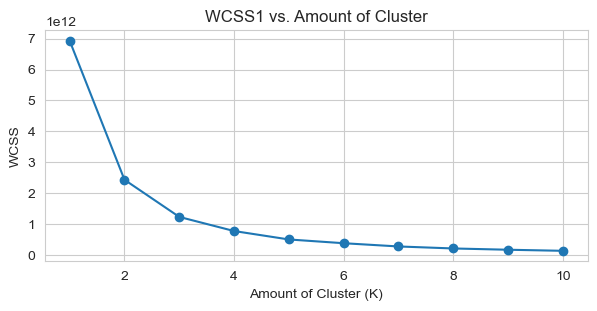

In [94]:
# Plot grafik WCSS vs. Nilai K = wcss pertama
plt.figure(figsize=(7,3))
plt.plot(list(range(1,11)), wcss, marker='o')
plt.title('WCSS1 vs. Amount of Cluster')
plt.xlabel('Amount of Cluster (K)')
plt.ylabel('WCSS')
plt.show()

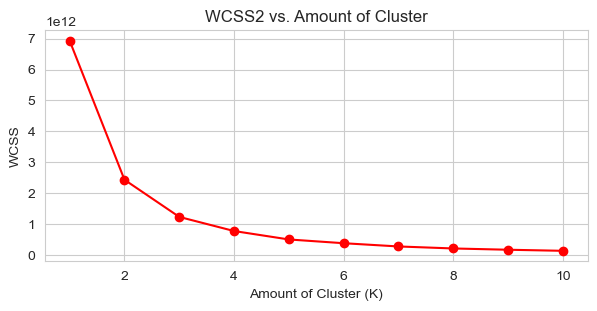

In [95]:
# Plot grafik WCSS vs. Nilai K = wcss kedua
plt.figure(figsize=(7,3))
plt.plot(list(range(1,11)), wcss2, marker='o', color='red')
plt.title('WCSS2 vs. Amount of Cluster')
plt.xlabel('Amount of Cluster (K)')
plt.ylabel('WCSS')
plt.show()

mendapati bahwa K optimal dari kedua plot yaitu saat K = 3

##### Membuat model clustering dengan K yang optimal

In [99]:
# cluster dari data X1
# membangun kembali model clustering dengan K = 3
# melatih model dengan data yang telah di agregasi
cluster1 = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=100)
cluster1.fit(X1)
labels1 = cluster1.labels_
centroids1 = cluster1.cluster_centers_

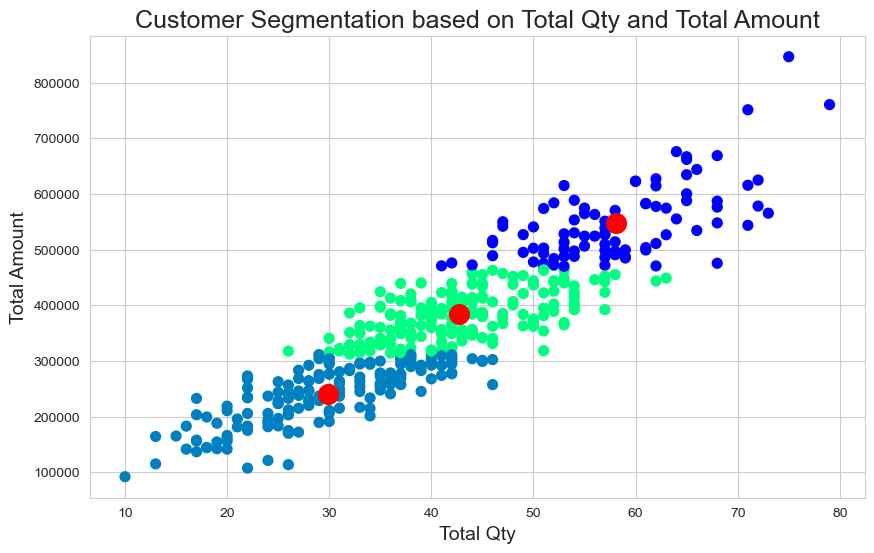

In [104]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
plt.scatter(x=data_cluster_agg['Qty'], y=data_cluster_agg['TotalAmount'], c=labels1, cmap='winter', s=50)
plt.scatter(x=centroids1[:,0], y=centroids1[:,1], c='red', s=200)
plt.title('Customer Segmentation based on Total Qty and Total Amount', fontsize=18)
plt.xlabel('Total Qty', fontsize=14)
plt.ylabel('Total Amount', fontsize=14)
plt.show()

In [100]:
# cluster dari data X2
# membangun kembali model clustering dengan K = 3
# melatih model dengan data yang telah di agregasi
cluster2 = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=100)
cluster2.fit(X2)
labels2 = cluster2.labels_
centroids2 = cluster2.cluster_centers_

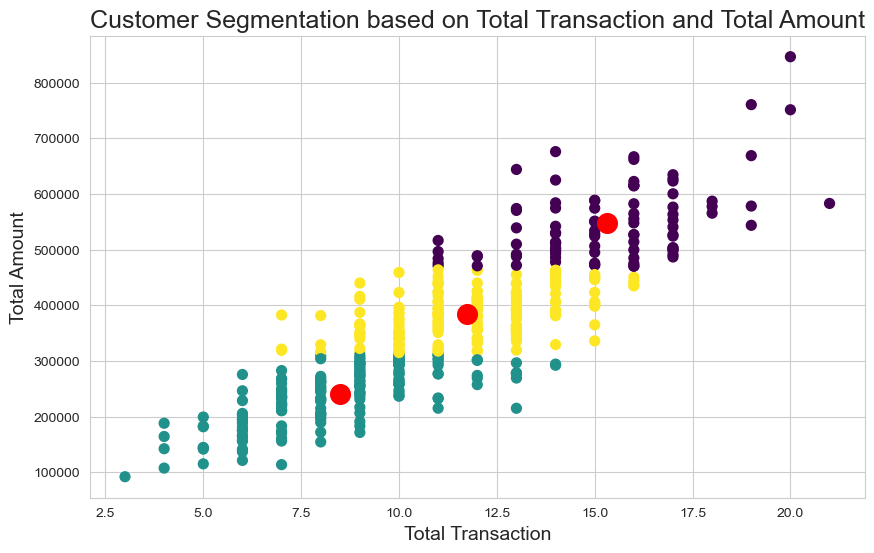

In [102]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
plt.scatter(x=data_cluster_agg['Total Transaction'], y=data_cluster_agg['TotalAmount'], c=labels1, cmap='viridis', s=50)
plt.scatter(x=centroids2[:,0], y=centroids2[:,1], c='red', s=200)
plt.title('Customer Segmentation based on Total Transaction and Total Amount', fontsize=18)
plt.xlabel('Total Transaction', fontsize=14)
plt.ylabel('Total Amount', fontsize=14)
plt.show()

````
Dari kedua hasil model clustering di atas disimpulkan bahwa:
1. Segmentasi Pelanggan berdasarkan Total Amount dan Total Qty menghasilkan 3 segmentasi
2. Segmentasi Pelanggan berdasarkan Total Transaction dan Total Qty menghasilkan 3 segmentasi
